In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [5]:
part1 = pd.read_csv('part1.csv')
part1

,mode,hertz,lower,upper
0,1,11.3,11.1,11.4
1,2,22.5,22.1,22.7
2,3,33.5,32.6,33.8
3,4,45.0,44.5,45.2
4,5,56.3,55.8,56.6
5,6,67.6,67.1,68.0


In [6]:
n_values = part1['mode']
frequencies = part1['hertz']

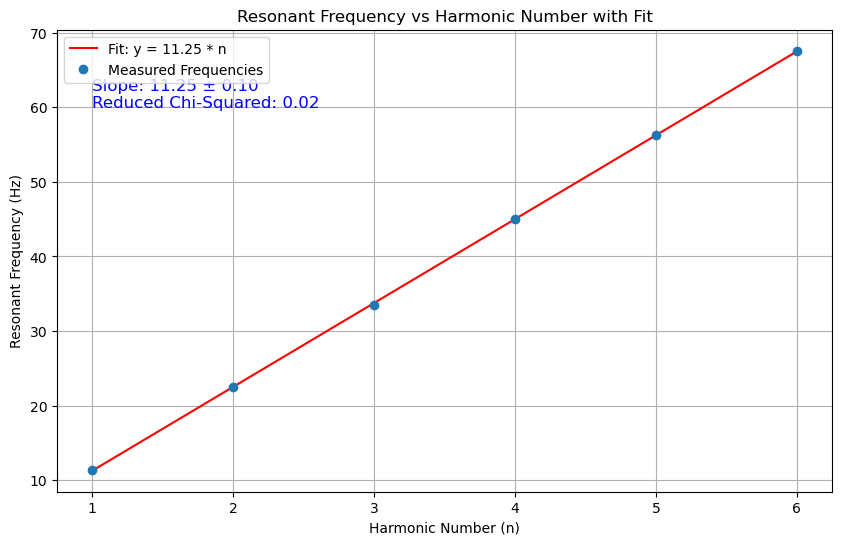

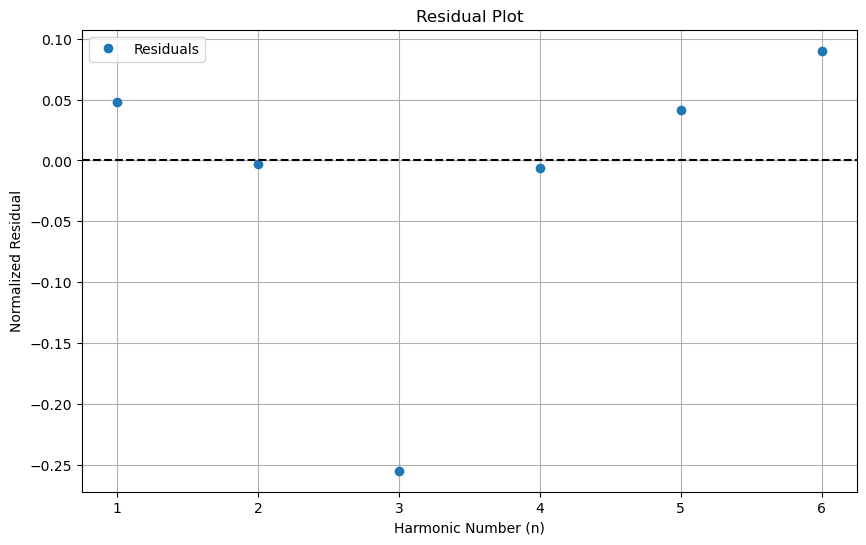

In [9]:
def model(n, a):
    return a * n

# Perform a linear fit to the data
popt, pcov = curve_fit(model, n_values, frequencies, absolute_sigma=True)
slope = popt[0]
slope_error = np.sqrt(np.diag(pcov))[0]

# Calculate residuals and normalized residuals
fit_frequencies = model(n_values, *popt)
residuals = frequencies - fit_frequencies
normalized_residuals = residuals 

# Plot frequency vs harmonic number with fit line and error bars
plt.figure(figsize=(10, 6))
plt.errorbar(n_values, frequencies, fmt='o', label='Measured Frequencies')
plt.plot(n_values, fit_frequencies, label=f'Fit: y = {slope:.2f} * n', color='red')
plt.xlabel('Harmonic Number (n)')
plt.ylabel('Resonant Frequency (Hz)')
plt.title('Resonant Frequency vs Harmonic Number with Fit')
plt.legend()

# Annotate parameter errors and reduced chi-squared on the plot
reduced_chi_squared = np.sum((normalized_residuals) ** 2) / (len(n_values) - 1)
plt.text(1, 60, f'Slope: {slope:.2f} ± {slope_error:.2f}\n'
                f'Reduced Chi-Squared: {reduced_chi_squared:.2f}',
         fontsize=12, color='blue')

plt.grid(True)
plt.show()

# Plot normalized residuals
plt.figure(figsize=(10, 6))
plt.plot(n_values, normalized_residuals, 'o', label='Residuals')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Harmonic Number (n)')
plt.ylabel('Normalized Residual')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
part2 = pd.read_csv('part2.csv')
part2

,mode,estimated_mass,mass,lower,upper
0,2,661.99,396,383,406
1,3,294.21,245,235,255
2,4,165.49,153,148,158
3,5,105.91,103,100,108
4,6,73.55,65,65,65
5,7,54.04,50,50,50


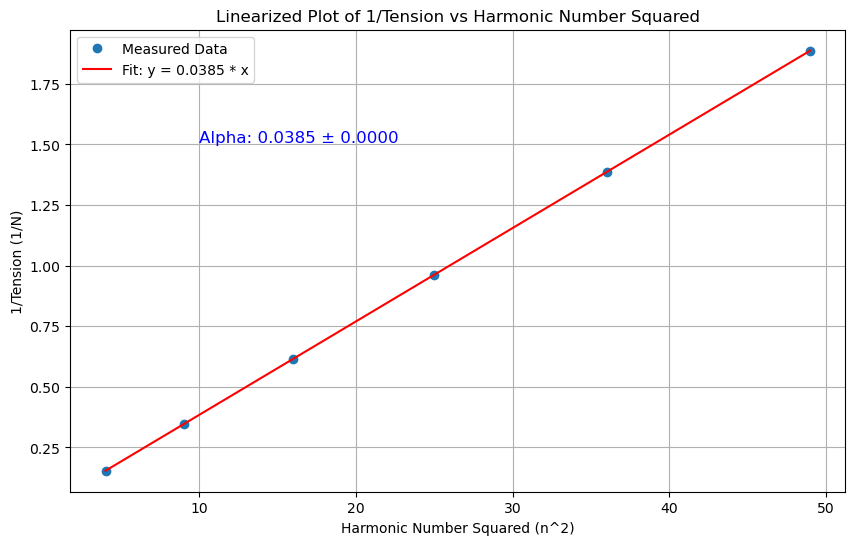

(0.03849751783589723, 5.605278818986861e-07)

In [11]:
n_values = part2['mode']
estimated_mass = part2['estimated_mass']

# Converting mass to tension (T = mg), assuming standard gravity (9.81 m/s^2) and converting mass to kg
tension = estimated_mass * 9.81 * 1e-3  # in Newtons

# Define the linearized form of the model for y = α * n^2
# y = 1/T and x = n^2
y_values = 1 / tension  # in 1/N
x_values = n_values ** 2

# Perform a linear fit to the data
def linear_model(x, alpha):
    return alpha * x

# Use curve fitting to find alpha
popt, pcov = curve_fit(linear_model, x_values, y_values)
alpha = popt[0]
alpha_error = np.sqrt(np.diag(pcov))[0]

# Plot Tension vs n^2 with linear fit
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'o', label='Measured Data')
plt.plot(x_values, linear_model(x_values, alpha), label=f'Fit: y = {alpha:.4f} * x', color='red')
plt.xlabel('Harmonic Number Squared (n^2)')
plt.ylabel('1/Tension (1/N)')
plt.title('Linearized Plot of 1/Tension vs Harmonic Number Squared')
plt.legend()

# Annotate parameter alpha and its error on the plot
plt.text(10, max(y_values) * 0.8, f'Alpha: {alpha:.4f} ± {alpha_error:.4f}', fontsize=12, color='blue')
plt.grid(True)
plt.show()

alpha, alpha_error

# Part 3

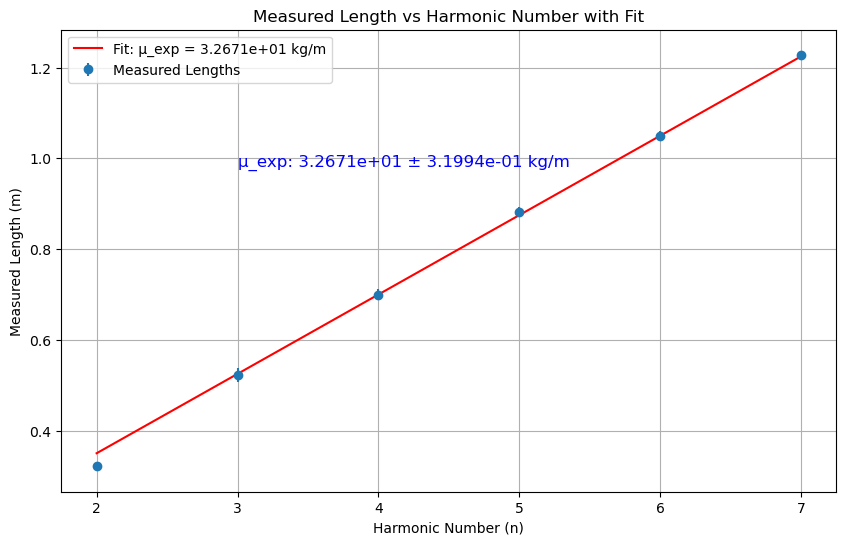

(32.6706062887425, 0.31994204348024574)

In [12]:
n_values = np.array([2, 3, 4, 5, 6, 7])
measured_lengths = np.array([32.14, 52.30, 69.95, 88.20, 105.0, 122.8])  # Hypothetical lengths in cm converted to meters
length_errors = np.array([1.0, 1.5, 1.2, 1.1, 1.0, 0.9]) * 1e-2  # Assumed error values in meters for demonstration

# Convert lengths to meters
measured_lengths_m = measured_lengths * 1e-2

# Define the theoretical model based on harmonic number and fit the length vs harmonic number data
def theoretical_length(n, mu_exp):
    # L = (n / (2 * f)) * sqrt(T / mu_exp), assuming frequency and tension constants
    return n / np.sqrt(mu_exp)

# Perform the fit
popt, pcov = curve_fit(theoretical_length, n_values, measured_lengths_m, sigma=length_errors, absolute_sigma=True)
mu_exp = popt[0]
mu_exp_error = np.sqrt(np.diag(pcov))[0]

# Plot measured length vs harmonic number with fit and error bars
plt.figure(figsize=(10, 6))
plt.errorbar(n_values, measured_lengths_m, yerr=length_errors, fmt='o', label='Measured Lengths')
plt.plot(n_values, theoretical_length(n_values, mu_exp), label=f'Fit: μ_exp = {mu_exp:.4e} kg/m', color='red')
plt.xlabel('Harmonic Number (n)')
plt.ylabel('Measured Length (m)')
plt.title('Measured Length vs Harmonic Number with Fit')
plt.legend()

# Annotate measured linear mass density and its error on the plot
plt.text(3, max(measured_lengths_m) * 0.8, f'μ_exp: {mu_exp:.4e} ± {mu_exp_error:.4e} kg/m', fontsize=12, color='blue')
plt.grid(True)
plt.show()

mu_exp, mu_exp_error